In [1]:
%pylab inline

import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [12]:
def k_means(k, data, iters):
    
    def init_centres():
        return data[np.random.choice(data.shape[0], k, replace=False), :]
    
    def nearest_centres(r):
        dists = ((data[:, np.newaxis, :] - r)**2).sum(axis=2)
        return np.argmin(dists, axis=1)
    
    def compute_centres(nearest_centres):
        return np.array([np.mean(data[nearest_centres == i, :], axis=0) for i in np.unique(nearest_centres)])
    
    r = init_centres()
    prev_nearest_centres = None
    curr_nearest_centres = nearest_centres(r)
    i = 0
    while (prev_nearest_centres is None or (prev_nearest_centres != curr_nearest_centres).any()) and i < iters:
        r = compute_centres(curr_nearest_centres)
        prev_nearest_centres = curr_nearest_centres
        curr_nearest_centres = nearest_centres(r)
        i += 1
    return r, curr_nearest_centres

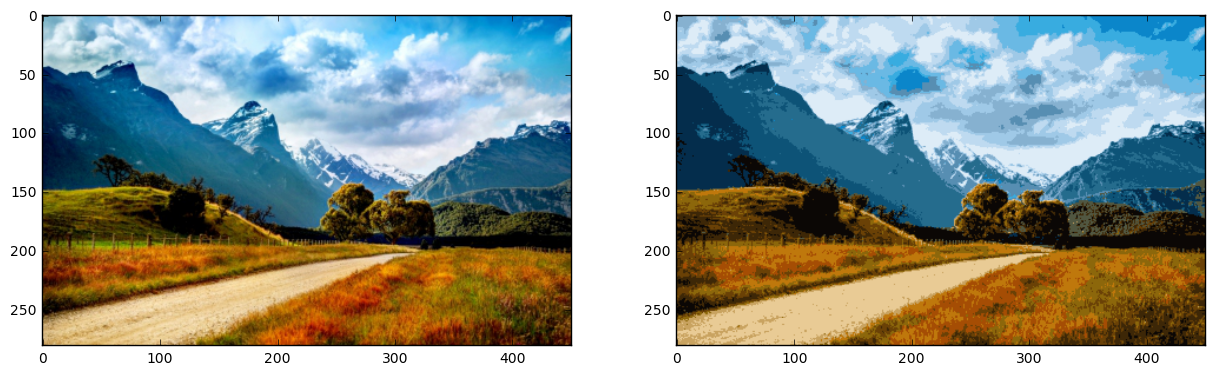

In [32]:
image0 = imread("image0.jpg")

figsize(15, 15)
subplot(1, 2, 1)
imshow(image0)

subplot(1, 2, 2)
pixels = image0.reshape((image0.shape[0]*image0.shape[1], 3))
centres, nearest_centres = k_means(20, pixels, 50)
for i in range(len(pixels)):
    pixels[i] = centres[nearest_centres[i]]
flatten_image = pixels.reshape((image0.shape[0], image0.shape[1], 3))
imshow(flatten_image)